In [29]:
from fastai.vision.all import *
from fastbook import *
from fastai.vision.widgets import *

In [21]:
import os
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

In [2]:
# Import fastbook functions, in our case we'll be using: search_images_ddg
from fastbook import *
# create a function that will take an arbitrary search term and return a list of urls.
def search_images(term, max=30):
  print(f"Searching for '{term}'")
  # search_images_ddg comes from fastbook: https://github.com/fastai/fastbook/blob/master/utils.py#L45
  return search_images_ddg(term, max_images=max)

In [55]:
urls = search_images('new balance shoe')
urls[0]

Searching for 'new balance shoe'


'http://image.sportsmansguide.com/adimgs/l/1/199789m2_ts.jpg'

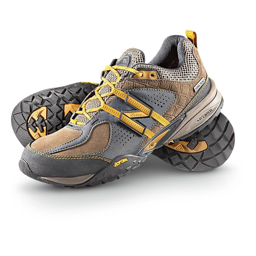

In [56]:
from fastdownload import download_url
dest = 'new balance.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [32]:
shoe_brands = 'nike','adidas','puma', 'new balance', 'converse', 'vans', 'sketchers'
path = Path('shoes')

In [34]:
if not path.exists():
    path.mkdir()
    for o in shoe_brands:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        download_images(dest, urls=search_images(f'{o} shoe', 150))
        #resize_images(path/o, max_size=400, dest=path/o)

Searching for 'nike shoe'
Searching for 'adidas shoe'
Searching for 'puma shoe'
Searching for 'new balance shoe'
Searching for 'converse shoe'
Searching for 'vans shoe'
Searching for 'sketchers shoe'


In [35]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

28

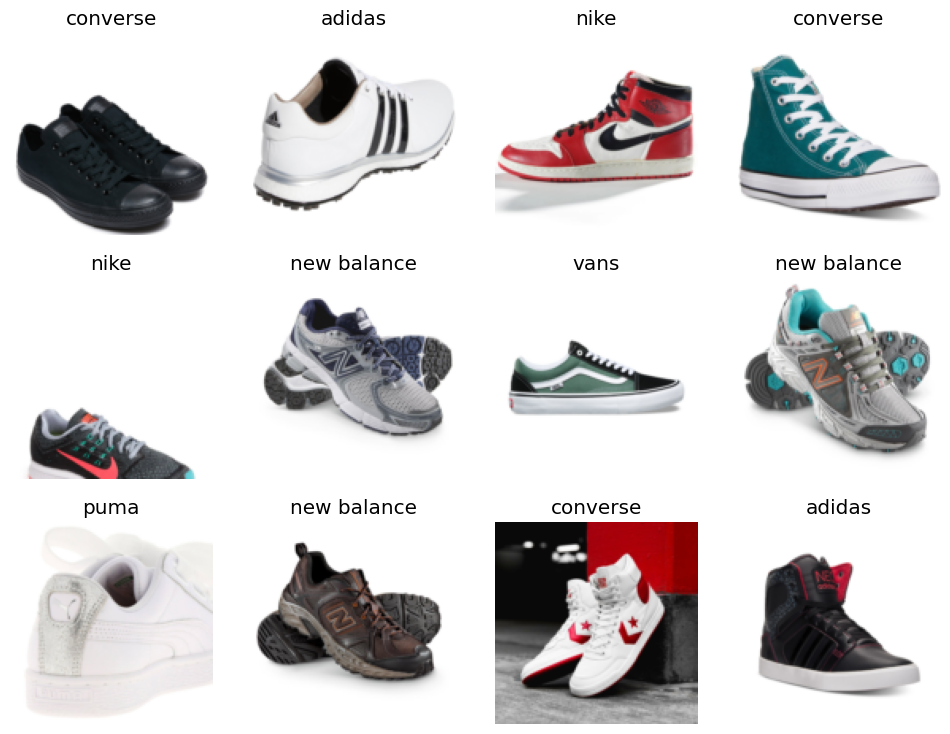

In [36]:

shoes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

dls = shoes.dataloaders(path)
dls.valid.show_batch(max_n=12, nrows=3)

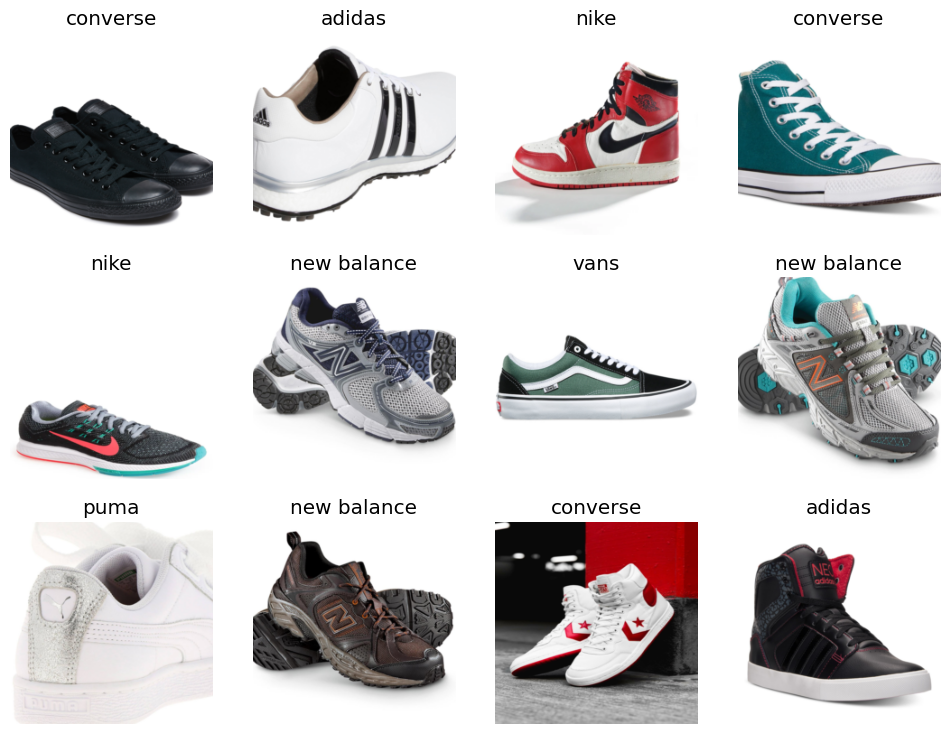

In [37]:
shoes = shoes.new(item_tfms=RandomResizedCrop(225, min_scale=0.5))#, batch_tfms=aug_transforms())
dls = shoes.dataloaders(path)
dls.valid.show_batch(max_n=12, nrows=3)

In [38]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.881217,1.630891,0.518717,00:25


/Users/joshbelot/Documents/Deep Learning Course/Deep-Learning-Course/.venv/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.639482,1.098681,0.374332,00:28
1,1.272883,0.923788,0.288770,00:25
2,1.022465,0.856769,0.256684,00:25
3,0.837443,0.805360,0.251337,00:24


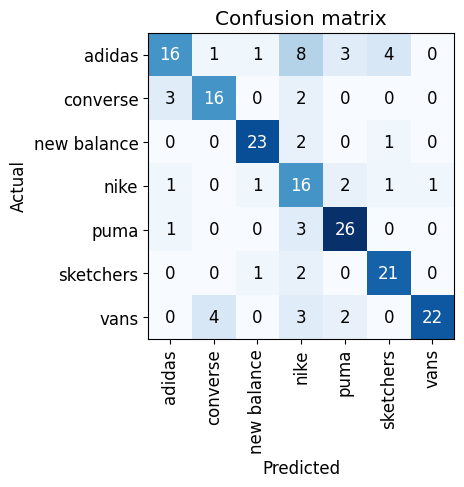

In [39]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
     

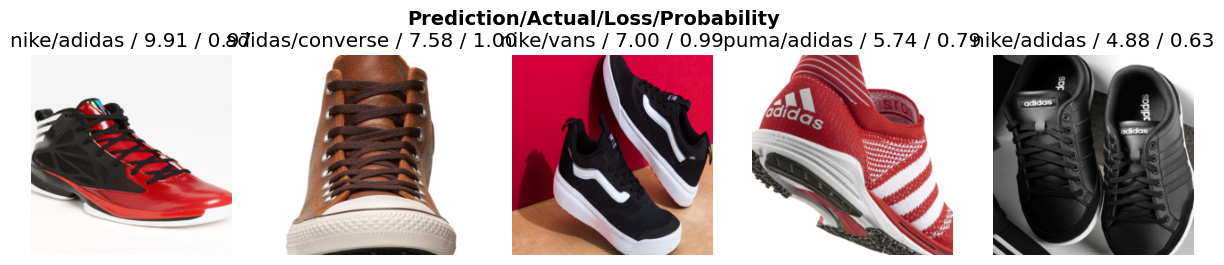

In [40]:

interp.plot_top_losses(5, nrows=1)

In [41]:
cleaner = ImageClassifierCleaner(learn)
cleaner
     

/Users/joshbelot/Documents/Deep Learning Course/Deep-Learning-Course/.venv/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [42]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [43]:
# export model
learn.export('model.pkl')